## Load Fucntion file

In [5]:
%run -i XAI.py


**HIstoric data**

# Give the path to save the results and load files

In [6]:
save_Model = create_folder_to_save('/XGBoost_tuned')
save_features = make_path_to_save(save_Model,'Features_importance')
saveRCP_45 = make_path_to_save(save_Model,'RCP45')
saveRCP_85 = make_path_to_save(save_Model,'RCP85')

In [7]:
df_historical_climate = Load_df_AI('df_AI.csv')
df_historical_climate.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,3149.000000,3149.000000,3149.000000
mean,13.568321,26.482422,17.388114
std,7.639396,7.430151,30.479733
min,-8.800000,0.557143,0.000000
25%,7.057143,20.942857,0.000000
50%,14.159677,27.214286,5.100000
75%,20.900000,32.700000,23.100000
max,25.957143,40.414286,473.400000


In [8]:
current_directory = os.getcwd()
skip_rows = 30
base_dir  = current_directory
filename  = r"Daily_SpringDischarge_SanMarcos.csv"
Approved_date = '2020-11-29'

#- SF-data is springflow data used in the validation through ET & SM-#

df_AI, Sf_data = Load_Springs(df_historical_climate,Approved_date,
                              skip_rows,base_dir,filename)

df_AI.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,3144.000000,3144.000000,3144.000000,3144.000000
mean,13.585542,26.493476,17.396238,4.996305
std,7.632612,7.429954,30.496073,1.871899
min,-8.800000,0.557143,0.000000,1.990286
25%,7.071429,20.942857,0.000000,3.550786
50%,14.200000,27.228571,5.100000,4.639786
75%,20.928571,32.714286,23.150000,6.040536
max,25.957143,40.414286,473.400000,12.759000


## Load the MACA 45

In [9]:
#----------------------------------------
# RCP 4.5 - M4-Tmax; M10-Precip; M17-Tmin
#----------------------------------------

temp = MACA_data_SM(45,'M_18_Japan')

df_MACA_RCP45 = pd.DataFrame()
df_MACA_RCP45[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP45.index = pd.DatetimeIndex(df_MACA_RCP45['Date'])
df_MACA_RCP45.drop(['Date'],axis=1,inplace=True)


temp =MACA_data_SM(45,'M_18_Japan')
df_MACA_RCP45['$P$ [mm]'] = temp['Precip[mm]'].values


temp = MACA_data_SM(45,'M_4_USA')
df_MACA_RCP45['$T_{min}$ [$^oC$]'] = temp['Tmin[C]'].values


df_RCP45_MACA = pd.DataFrame()
df_RCP45_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP45['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP45_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP45['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP45_MACA['$P$ [mm]'] = df_MACA_RCP45['$P$ [mm]'].resample('W').sum().values
df_RCP45_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,15.311680,27.562172,18.328250
std,7.595859,7.689294,30.304124
min,-13.247194,1.649962,0.000000
25%,8.967193,21.722520,1.097293
50%,16.249530,28.119324,6.868001
75%,22.411885,33.920475,22.892587
max,27.602197,46.927602,400.595908


## Load the RCP 8.5

In [10]:

#----------------------------------------
# RCP 8.5- M4-Tmax; M10-Precip; M17-Tmin
#----------------------------------------

temp = MACA_data_SM(85,'M_18_Japan')

df_MACA_RCP85 = pd.DataFrame()
df_MACA_RCP85[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP85.index = pd.DatetimeIndex(df_MACA_RCP85['Date'])
df_MACA_RCP85.drop(['Date'],axis=1,inplace=True)



df_MACA_RCP85['$P$ [mm]']=MACA_data_SM(85,'M_18_Japan')['Precip[mm]'].values



df_MACA_RCP85['$T_{min}$ [$^oC$]']= MACA_data_SM(85,'M_4_USA')['Tmin[C]'].values


df_RCP85_MACA = pd.DataFrame()
df_RCP85_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP85['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP85_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP85['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP85_MACA['$P$ [mm]'] = df_MACA_RCP85['$P$ [mm]'].resample('W').sum().values
df_RCP85_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,16.317949,28.518329,17.723373
std,7.637849,8.005146,28.827272
min,-5.535311,-2.486796,0.000000
25%,9.987640,22.538566,0.969075
50%,17.270654,29.091135,6.643954
75%,23.415739,34.899279,21.658387
max,29.437982,46.867452,341.637357


# Feature Engineering

In [11]:
# Pumping patterns is hypothesized to be associated with the month
df_AI['Month'] = df_AI.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

df_AI['$P^{lag1}$ [mm]'] = df_AI['$P$ [mm]'].shift(1)
df_AI['$P^{lag2}$ [mm]'] = df_AI['$P$ [mm]'].shift(2)

df_AI['SF$^{lag1} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(1)
df_AI['SF$^{lag2} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(2)

df_AI.dropna(inplace=True)
#df_AI

In [12]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']

#Create Independent and dependent variable for machine learning
X = df_AI[Features].to_numpy()
Y = df_AI[Target].to_numpy()

#Take the tain set till 2005 and test set from 2006 till 2020
df_AI_Train = df_AI[:'2008-12-31']

df_AI_Test = df_AI['2009-01-01':]



train_X = df_AI_Train[Features].to_numpy()
train_y = df_AI_Train[Target].to_numpy()
test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)


# Essemble tree methods

params = {'learning_rate': 0.9172796274701319, 'n_estimators': 947, 'max_depth': 11}

## XGBoost

In [20]:
%run -i XAI.py

 34%|███▍      | 17/50 [00:40<01:18,  2.37s/it]

Best parameters found: {'learning_rate': 0.9585025384309751, 'n_estimators': 457, 'max_depth': 7}
Best objective output = -0.18346850150033922


Terminating algorithm: Exceeded maximum iterations without improvement.############ Model Accuracy -Training set ############
MAE: 2.037 m/s^3
NSE: 1.000
RMS: 0.001 m/s^3
R-squared: 1.000
########################################
 
############ Model Accuracy -Test set############
MAE: 0.211 m/s^3
NSE: 0.982
R-squared: 0.982
RMS: 0.245 m/s^3
########################################
 


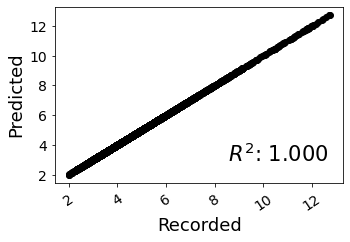

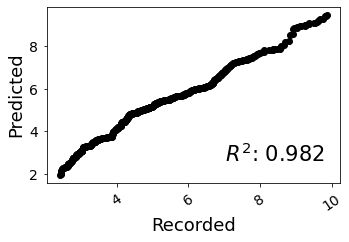

In [21]:
objective_parameters = [{'name' : 'learning_rate','bounds' : [0.01,1], 'type' : 'float'},
                        {'name' : 'n_estimators', 'bounds' : [100,1000],'type' : 'int'},
                        {'name' : 'max_depth',    'bounds' : [6,12],'type' : 'int'} ]

params = Genetic_algorithm(XGBRegressor,objective_parameters,train_X,train_y,save_Model)

############ Model Accuracy -Training set ############
MAE: 2.037 m/s^3
NSE: 1.000
RMS: 0.001 m/s^3
R-squared: 1.000
########################################
 
############ Model Accuracy -Test set############
MAE: 0.211 m/s^3
NSE: 0.982
R-squared: 0.982
RMS: 0.245 m/s^3
########################################
 


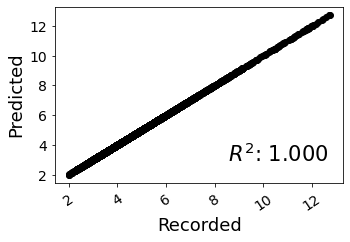

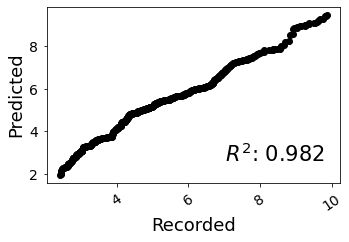

In [13]:
params = {'learning_rate': 0.9585025384309751, 'n_estimators': 457, 'max_depth': 7}
Model = XGBRegressor(**params)
Model.fit(train_X,train_y)

print_results(Model, train_X,train_y,save_Model)

In [14]:
## Test period plot

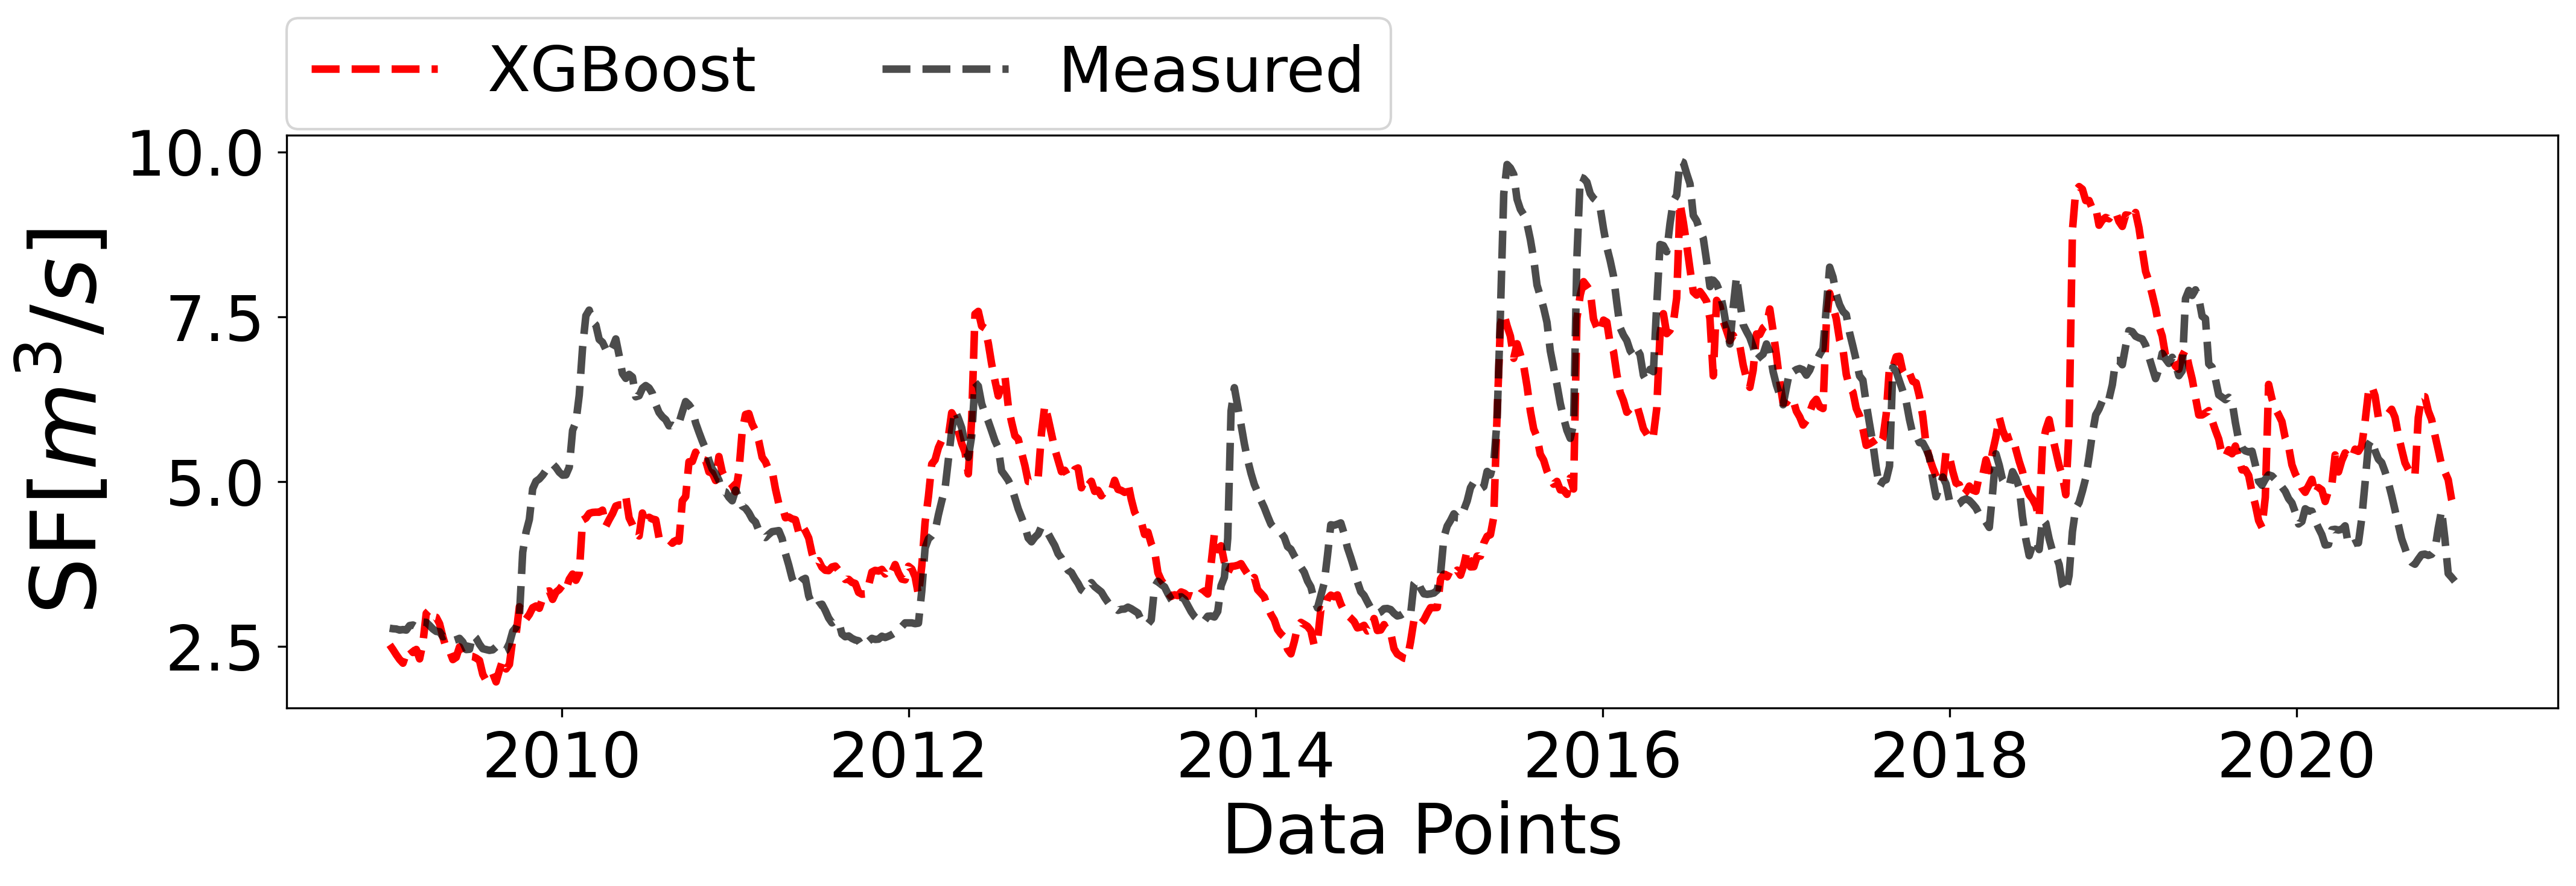

In [15]:
fig = plt.figure(figsize=(14,5),dpi=300)
ax = fig.add_subplot(1,1,1)

ax.plot(df_AI_Test['SF$[m^3/s]$'].index,
        df_AI_Test['SF$^{pred} [m^3/s]$'] , 
        '--', color = 'red', lw = 3, label = 'XGBoost')
ax.plot(df_AI_Test['SF$[m^3/s]$'].index,
        df_AI_Test['SF$[m^3/s]$'],'--', 
        color = 'black', lw = 3, alpha=0.7, label = 'Measured')

ax.set_xlabel('Data Points', fontsize = 28)
ax.tick_params(axis = "x", labelsize = 25)
ax.xaxis.set_tick_params(pad=5)
ax.set_ylabel('SF$[m^3/s]$', fontsize = 36)

ax.tick_params(axis = "y", labelsize = 25)
ax.yaxis.set_tick_params(pad=5) # gap between ticks and axis
yoffset = 0.05                    #gap between ticks and label
################################################ 
plt.legend(bbox_to_anchor=(0,1.01),
           loc="lower left", ncol=3, 
           borderaxespad=0., prop={'size': 25})

plt.tight_layout(pad=1.08)
fig.savefig(save_Model + str('/Prelim_Data_Analysis__Complete.jpg'), 
            format='jpg', dpi=300, bbox_inches = 'tight')


In [16]:
df_AI.to_excel(save_Model+ str('/df_AI_Spring.xlsx'))


# Shapley Anlysis 

**Shapley Imporatance barplot**

In [17]:
####################################################################
# Update Model SpringFLow Model
####################################################################
#With the whole data from 1946 -2020
Model = Model.fit(X, Y)

explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())


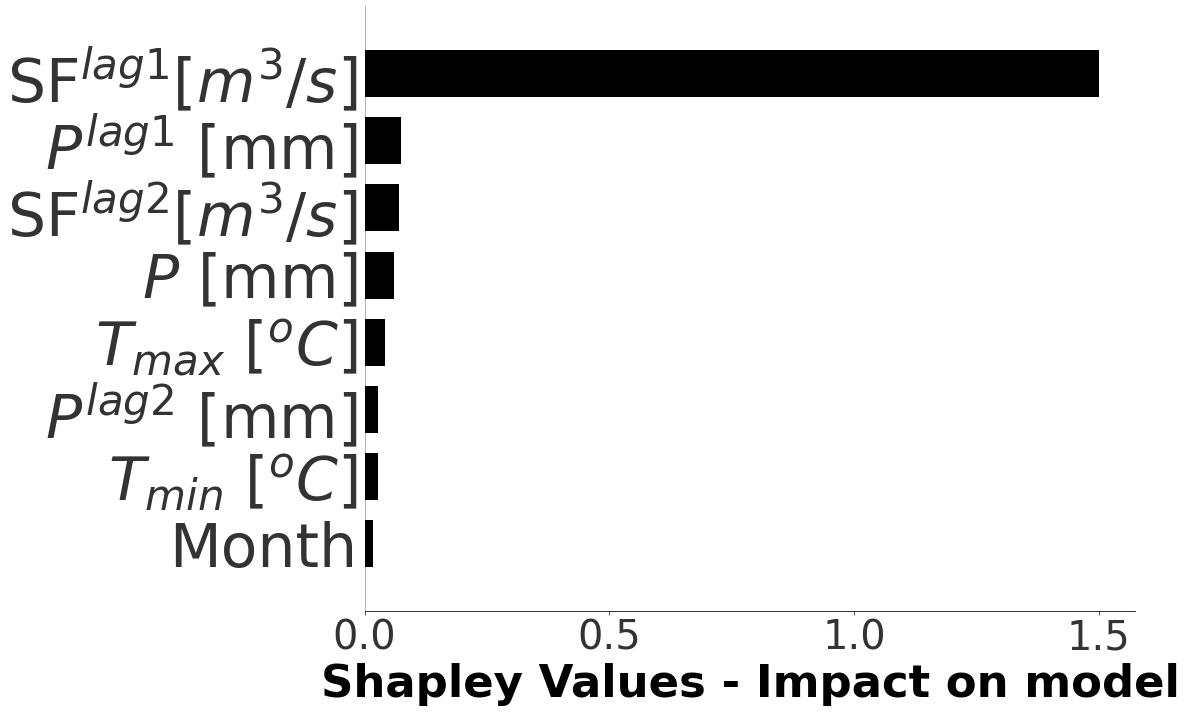

In [18]:

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), 
                  Features, plot_size=(16,10), show=False, 
                  plot_type = "bar", color = "black")
plt.xlabel('Shapley Values - Impact on model', fontsize=45, fontweight='bold')
plt.tick_params('y',labelsize=60)
plt.tick_params('x',labelsize=40)
plt.tight_layout(pad=1.08)
plt.savefig(save_features + str('/Feature Importances- Hist.jpg'),
            format='jpeg', dpi=300, bbox_inches ='tight')


**Shapley global & local feature importance plot**

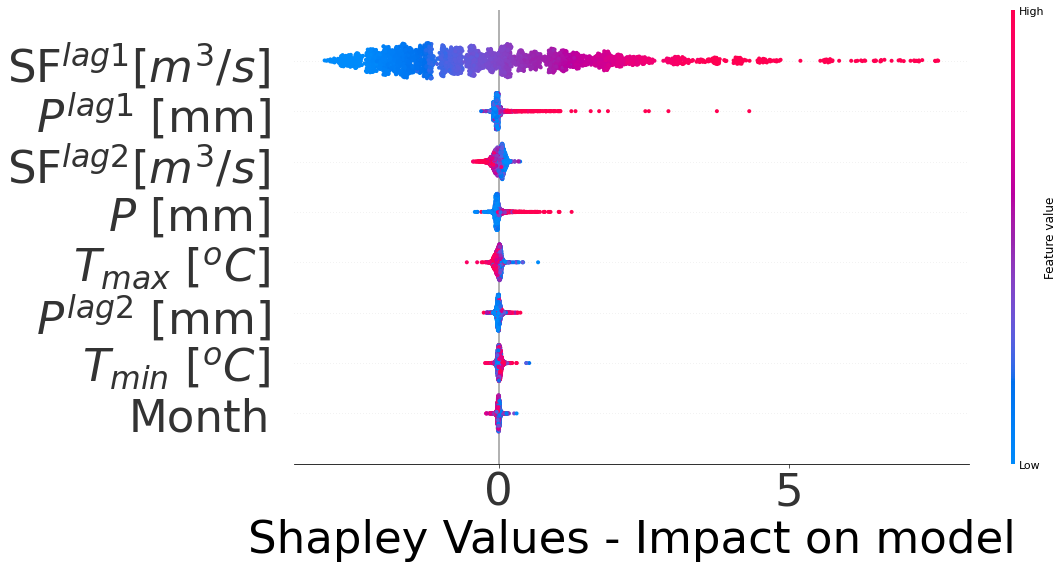

In [19]:
explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), 
                      Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=45)
plt.tick_params(labelsize=45)
plt.tight_layout(pad=1.08)
plt.savefig(save_features +str('/Feature_Importance_SF.pdf'), 
                    format='jpeg', dpi=300, bbox_inches ='tight')

**Collage of the top 4 important features according to shapley**

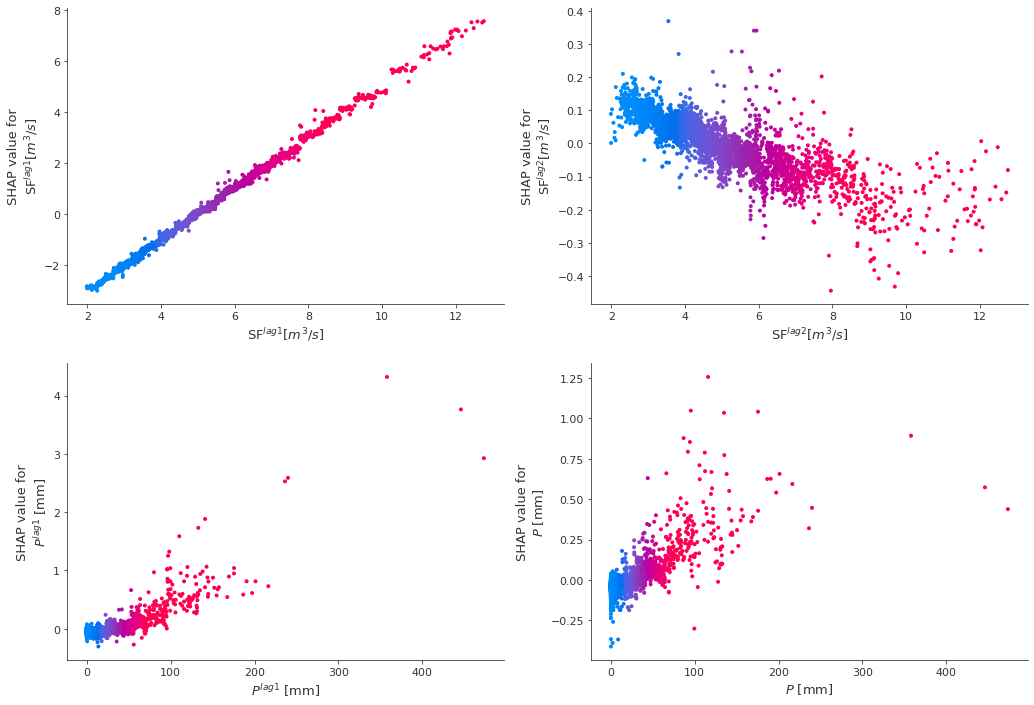

In [20]:
interaction_collage(df_AI,'SF$^{lag1} [m^3/s]$', 
                    '$P^{lag1}$ [mm]',
                    'SF$^{lag2} [m^3/s]$',
                    '$P$ [mm]', save_features)


**Save all feature importance plots**

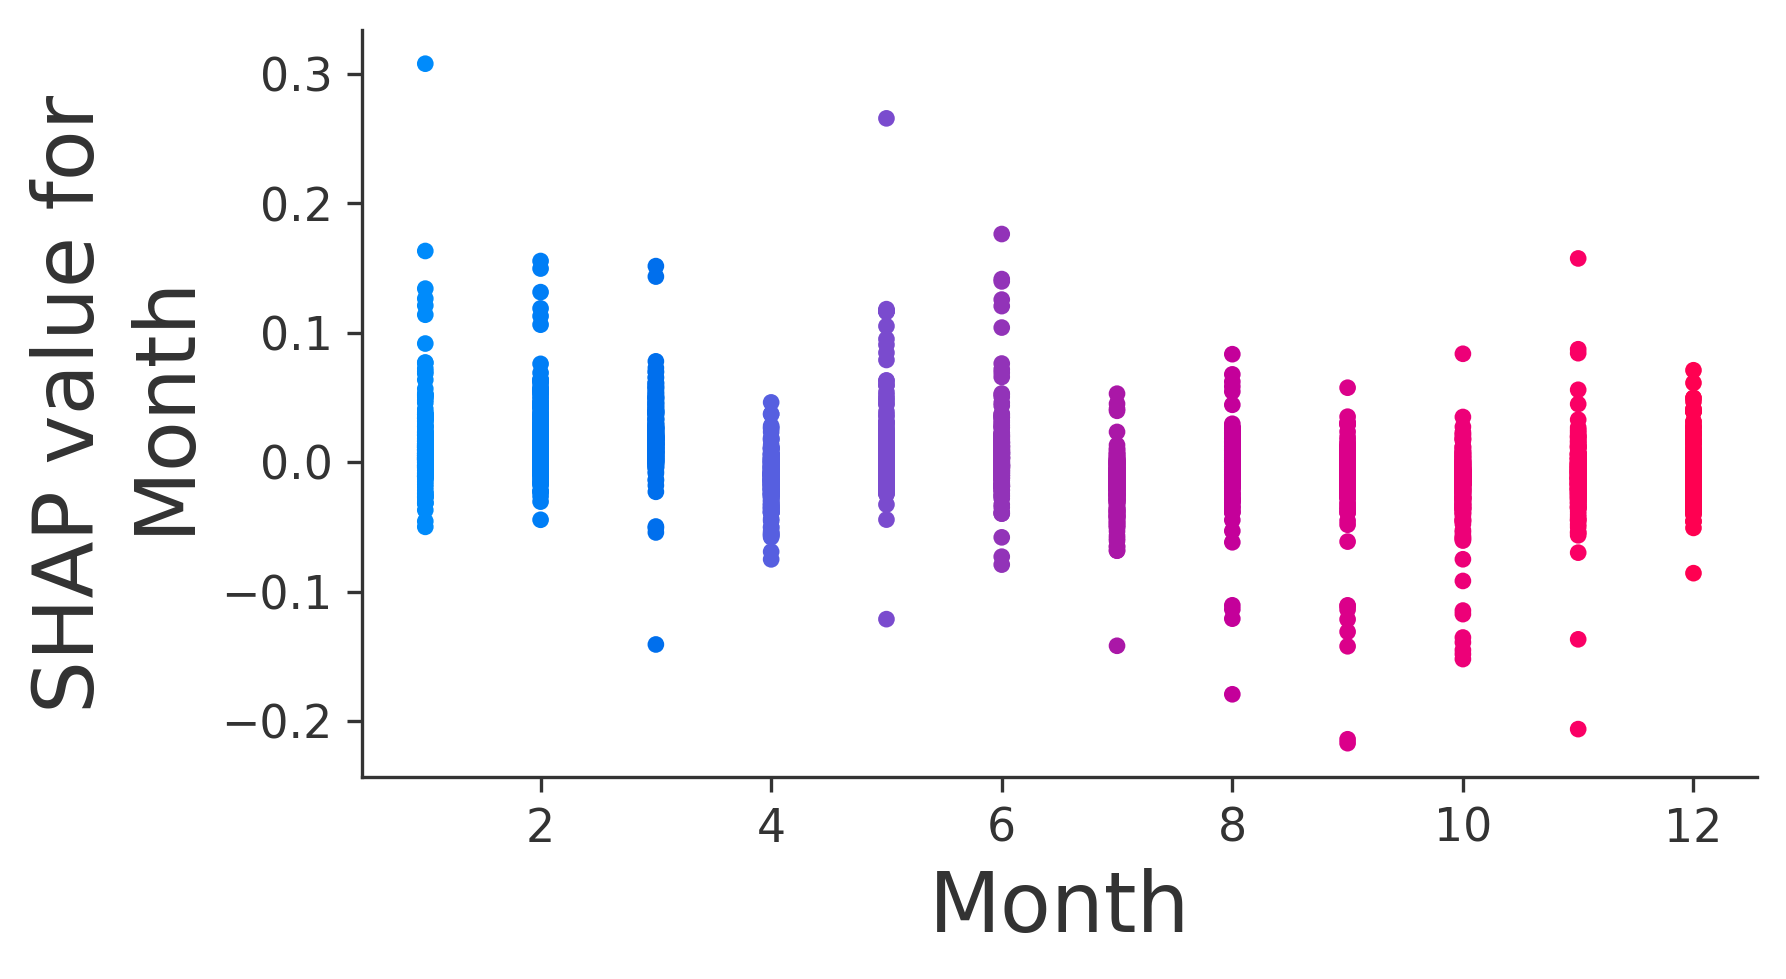

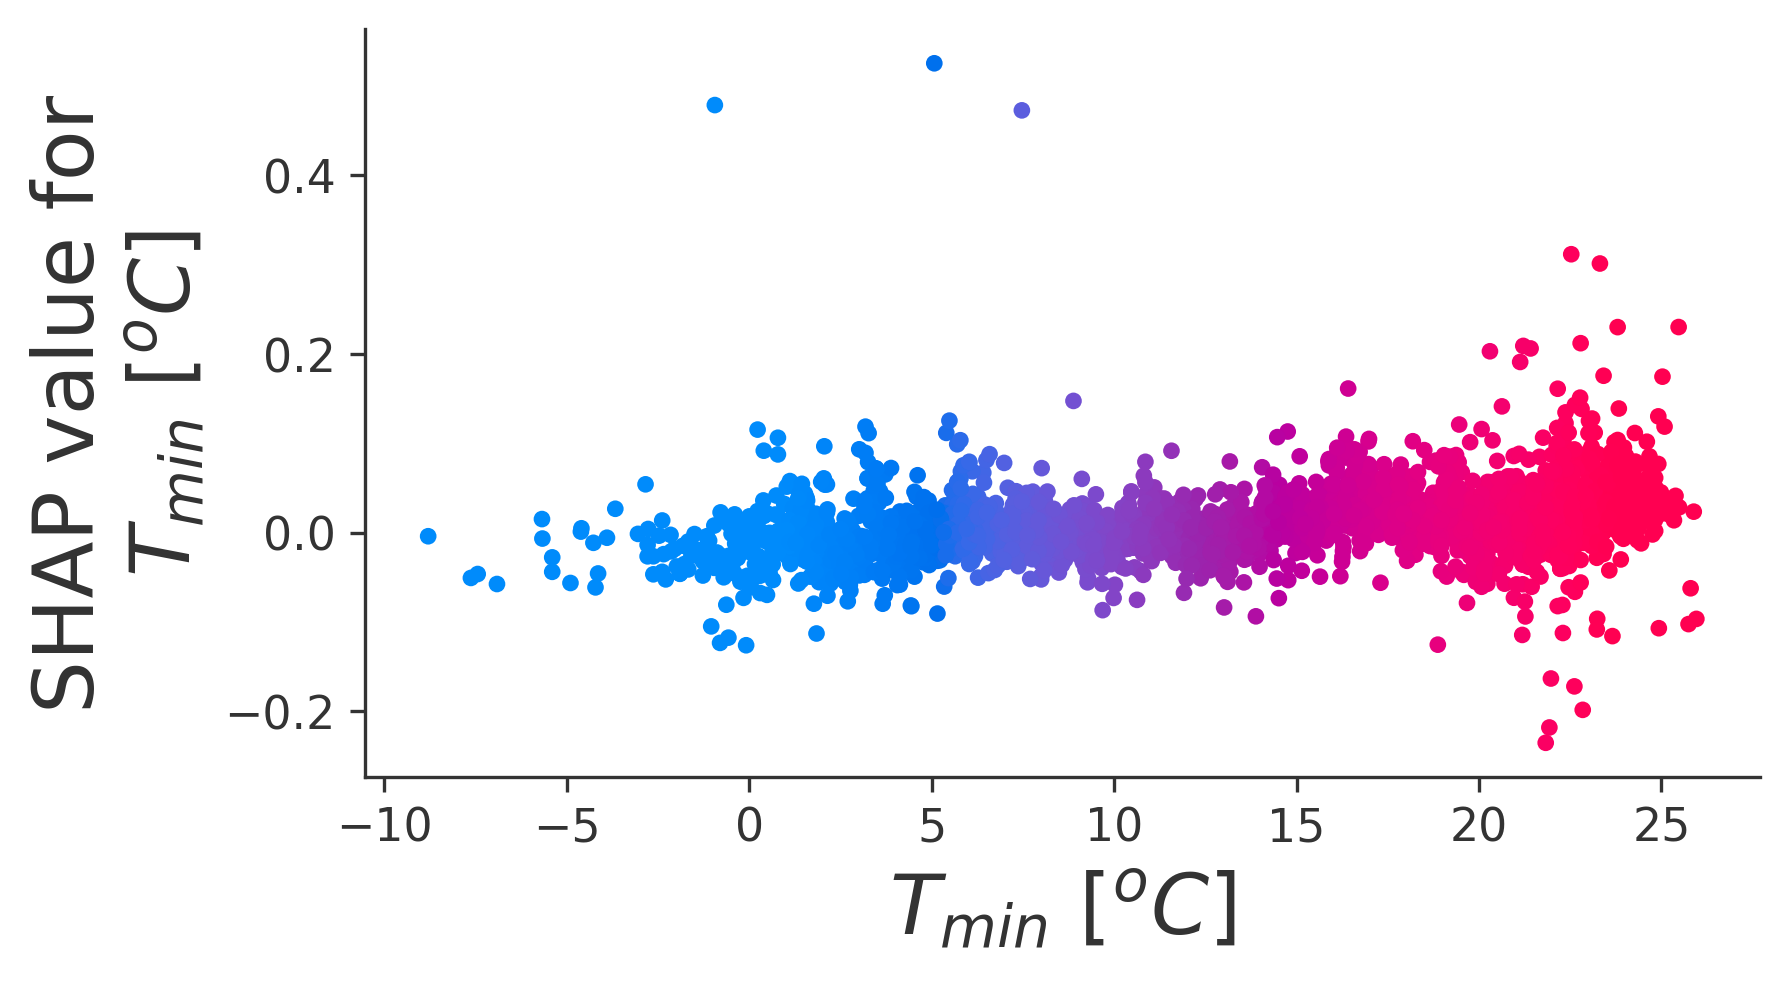

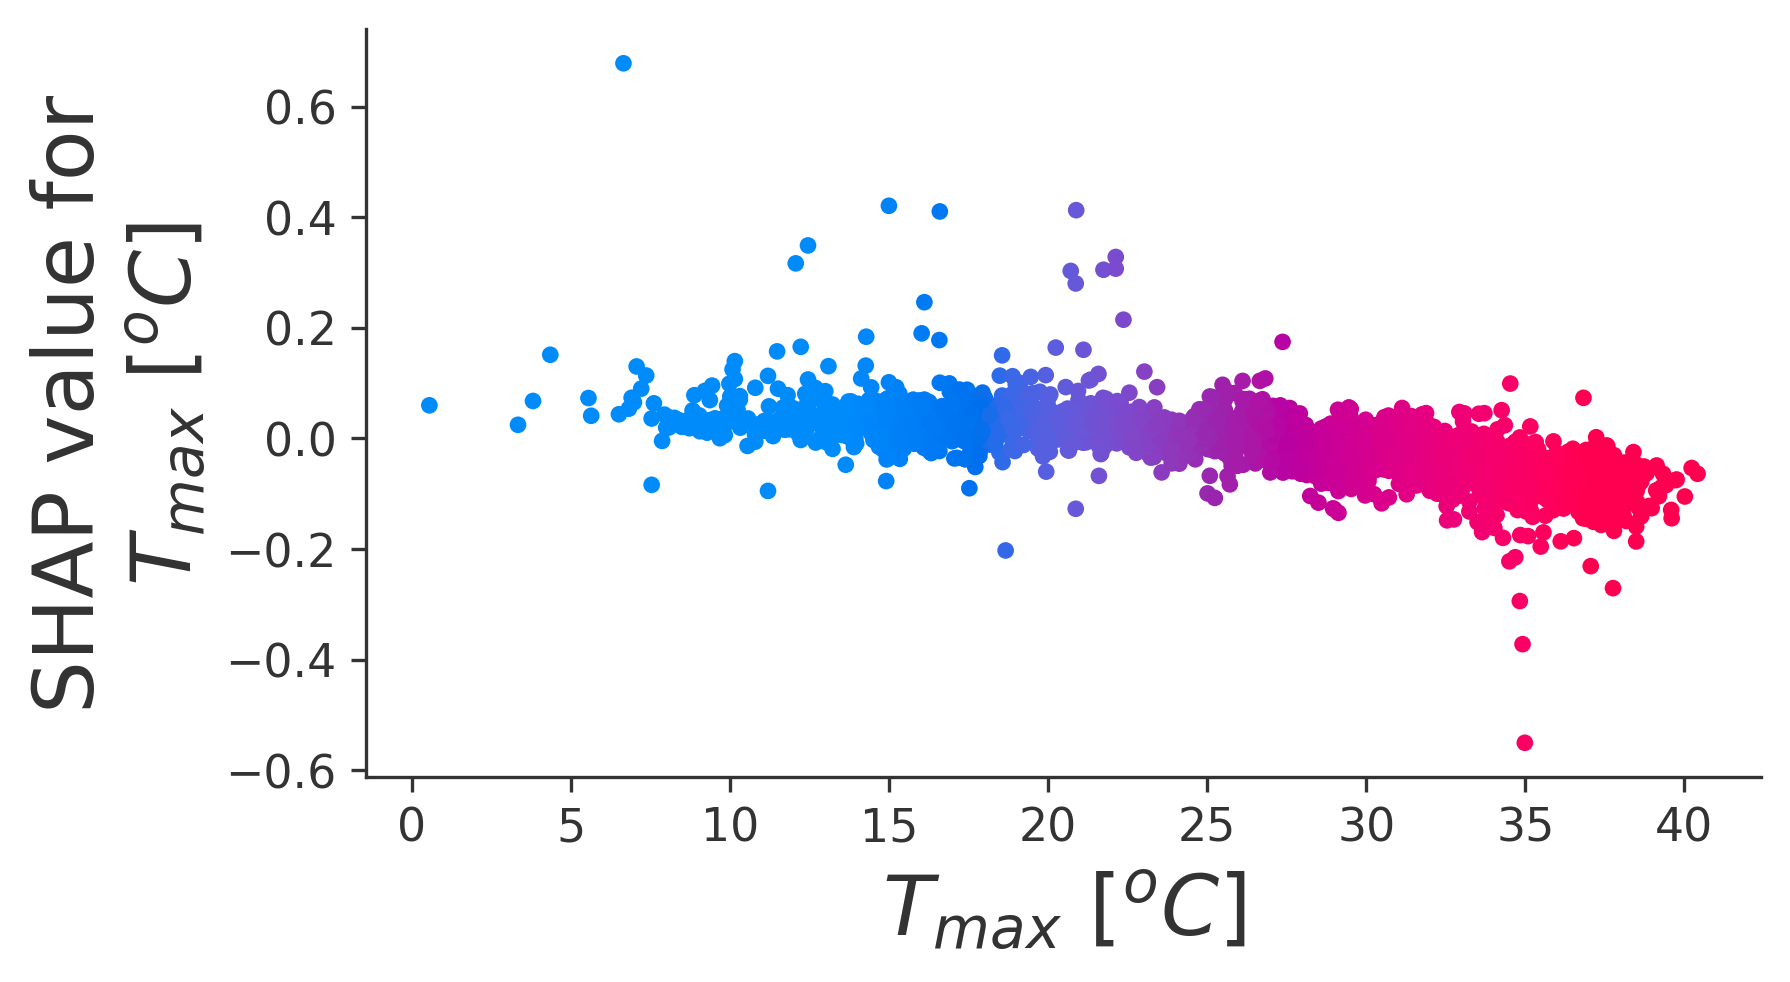

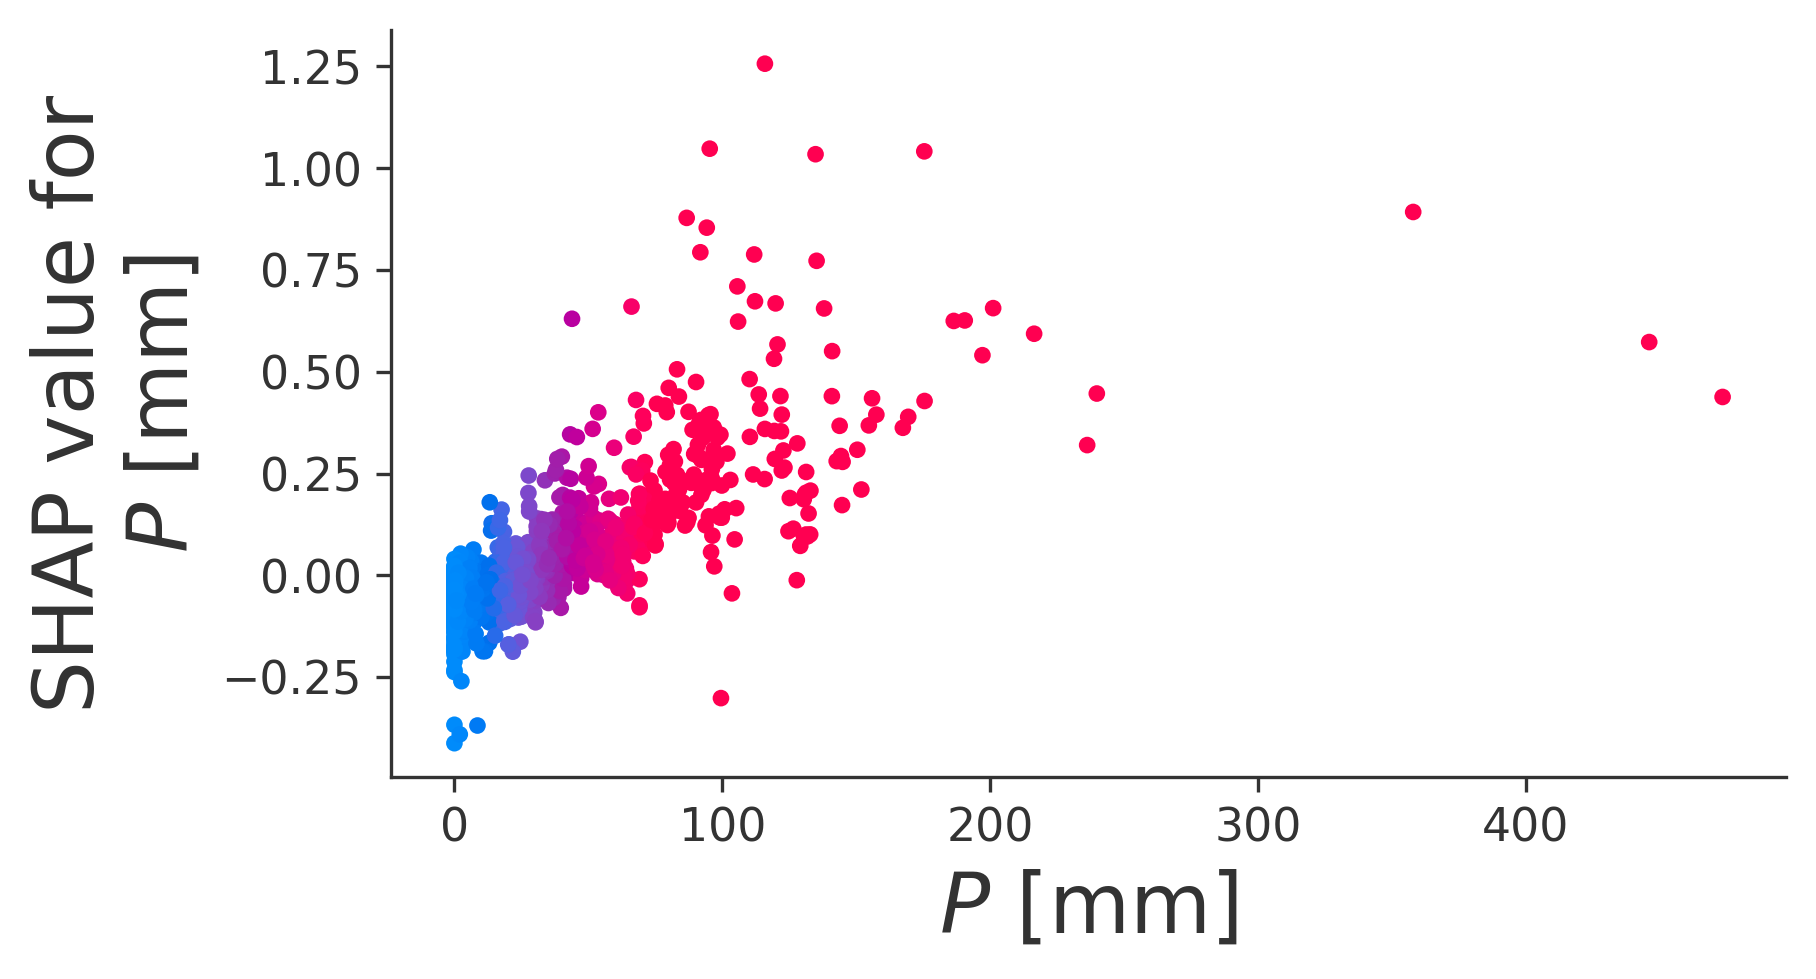

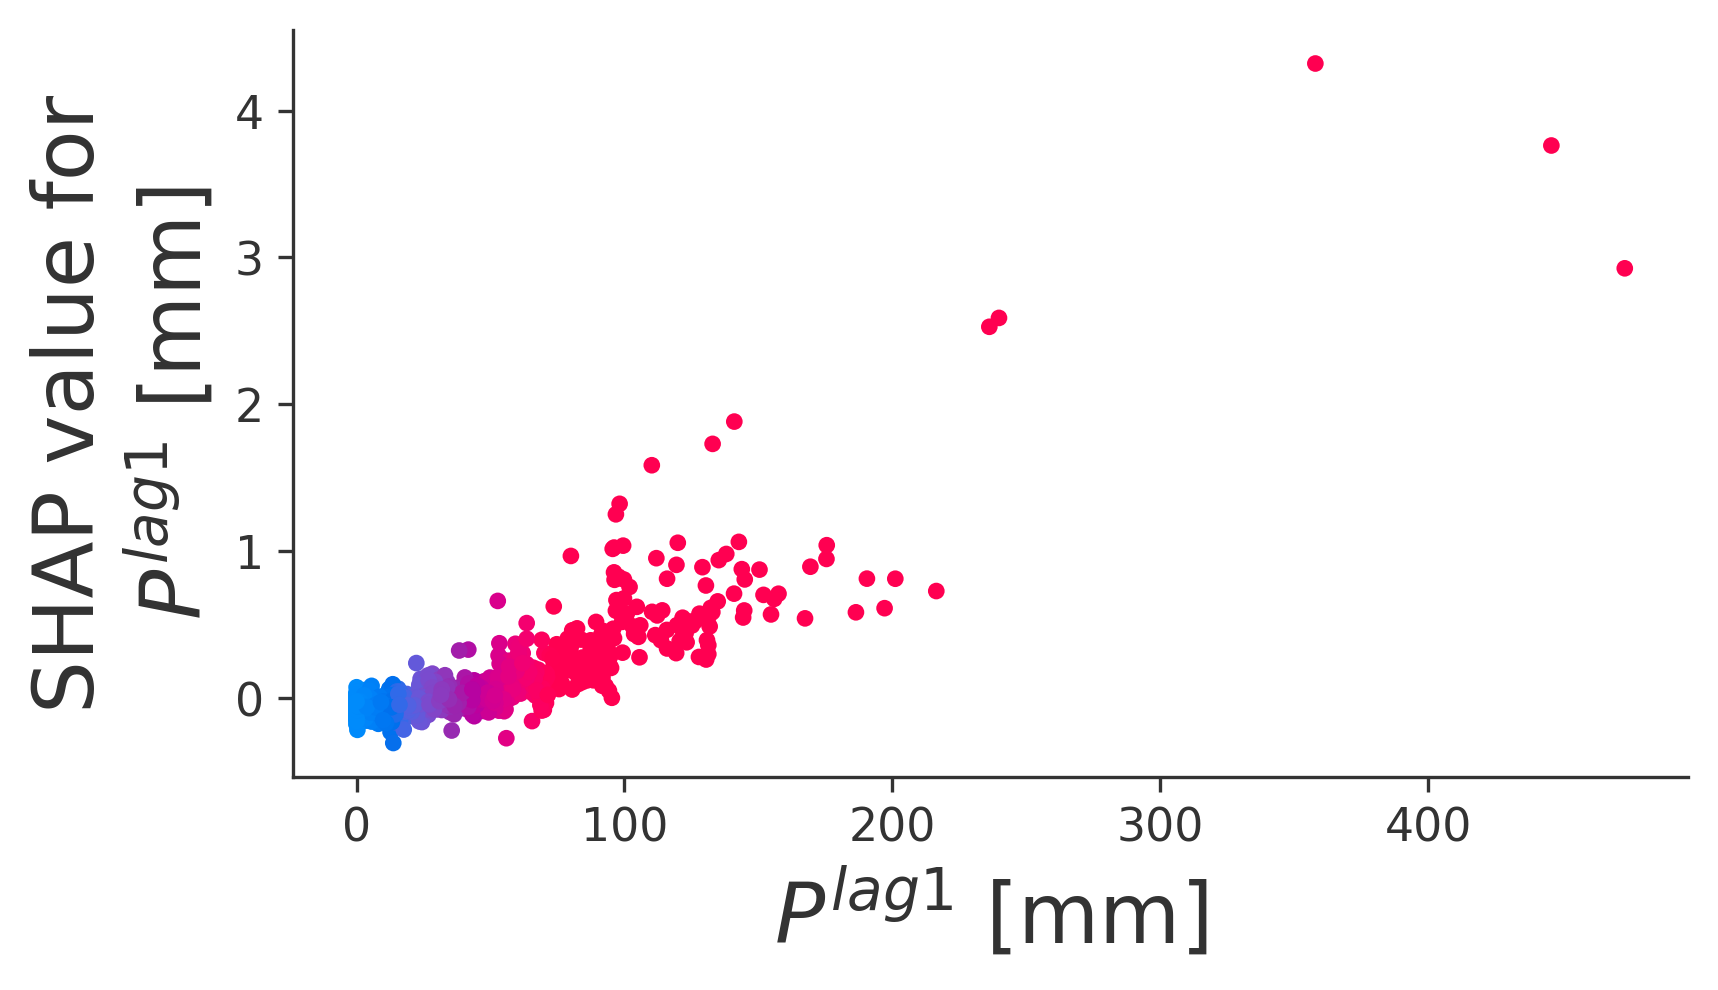

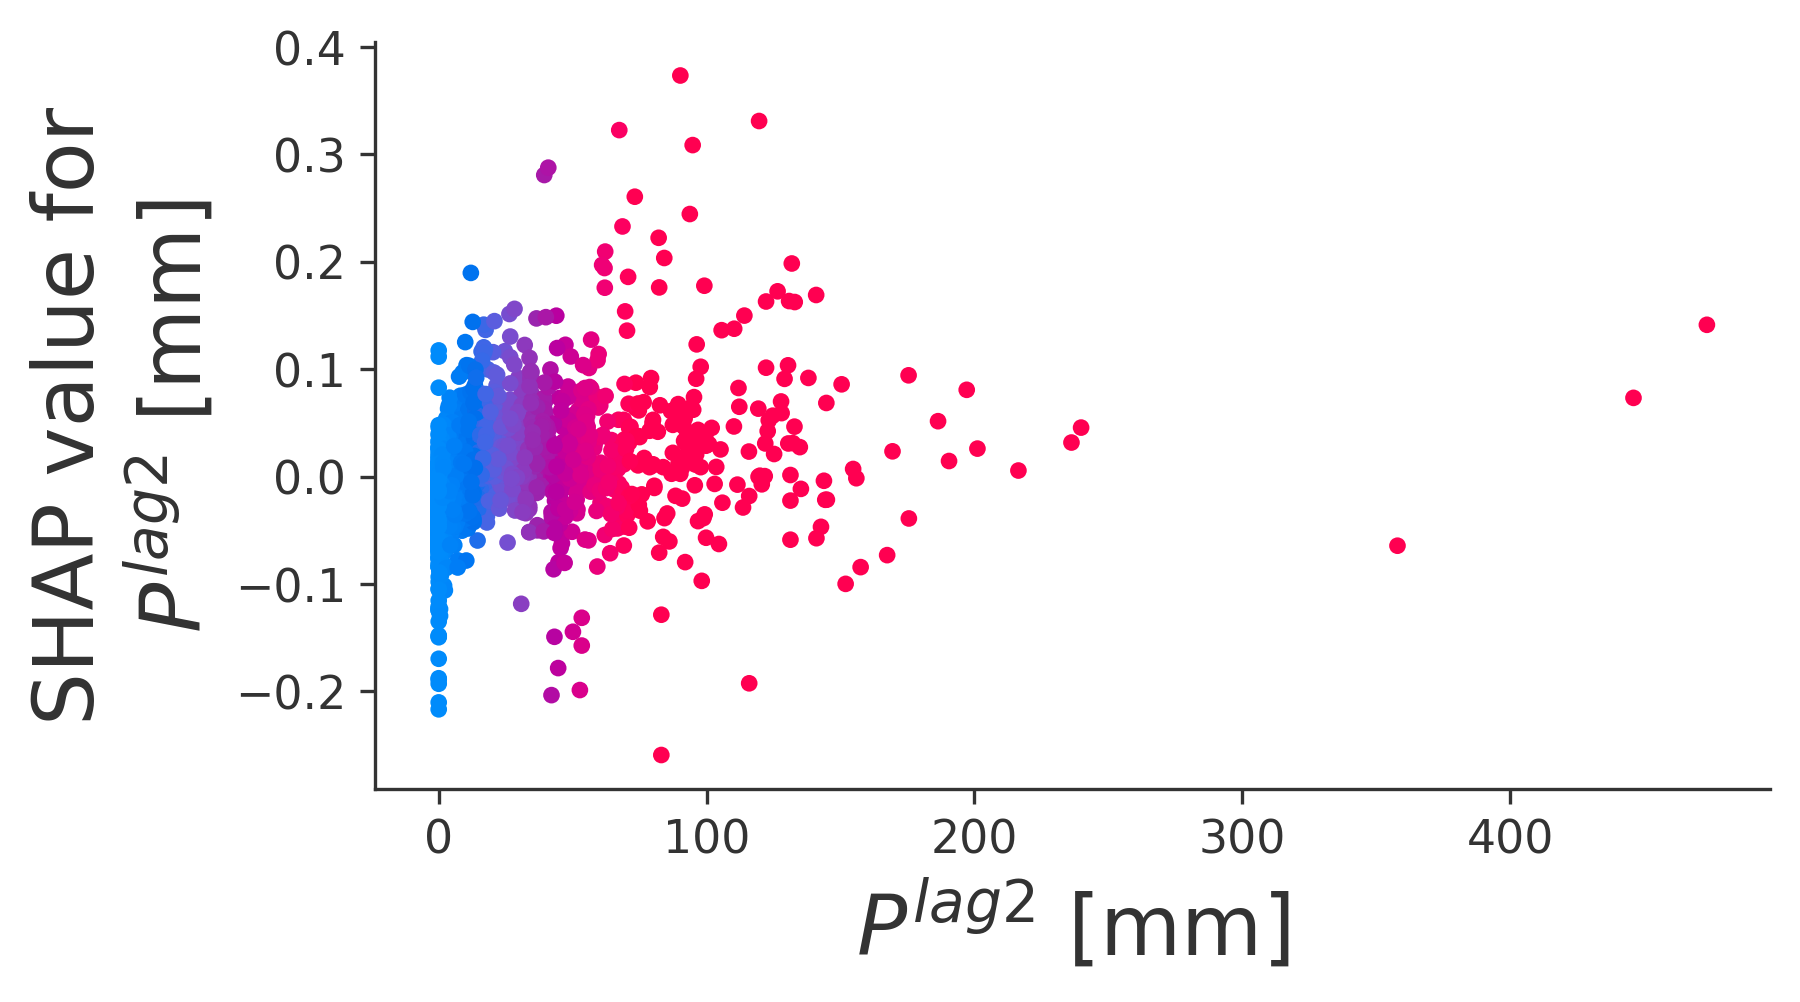

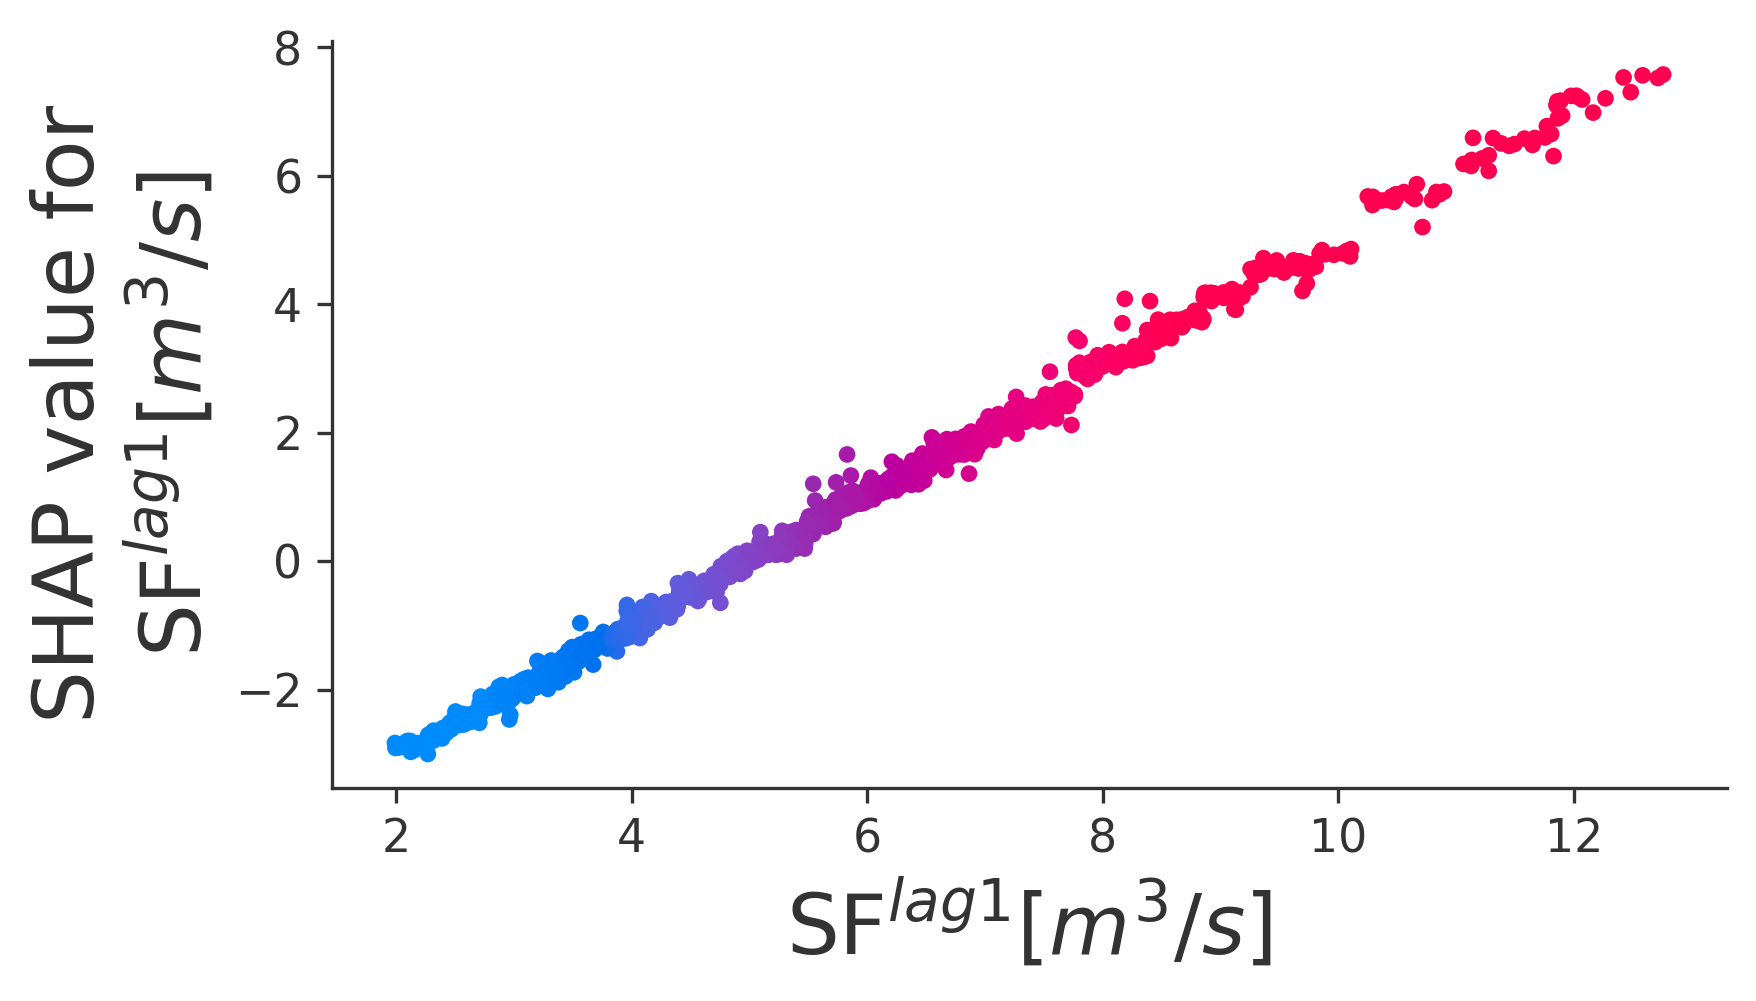

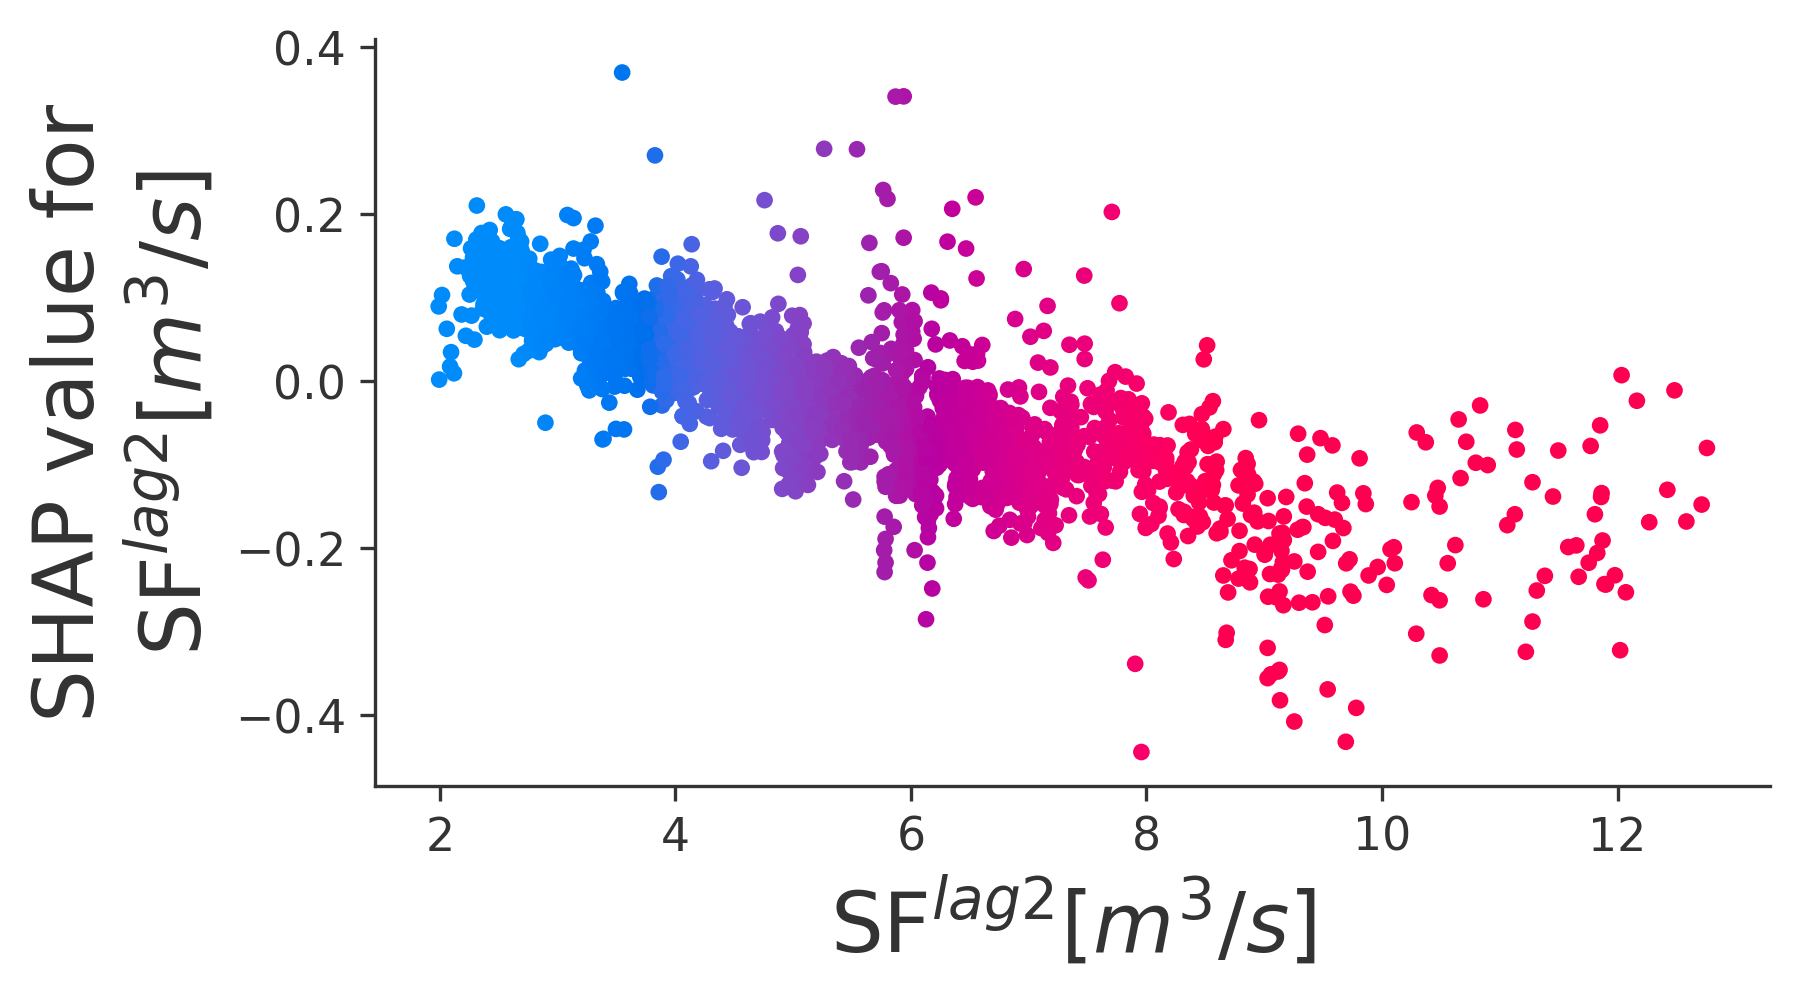

In [21]:
Features_= save_all_features(Features,save_features)

# Climate change analysis

## RCP 4.5

############ Model Validation set Accuracy RCP 4.5###########
MAE: 0.420 m/s^3
NSE: 0.891
RMS: 0.596 m/s^3
R-squared: 0.891
########################################
 
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,6.521904,15.343484,27.573830,18.452928,4.723300
std,3.448643,7.615139,7.683025,30.495874,1.509007
min,1.000000,-13.247194,1.649962,0.000000,1.858157
25%,4.000000,9.014431,21.744034,1.113107,3.708908
50%,7.000000,16.297148,28.148388,6.930567,4.438647
75%,10.000000,22.475353,33.930487,23.021054,5.512789
max,12.000000,27.602197,46.927602,400.595908,12.805681


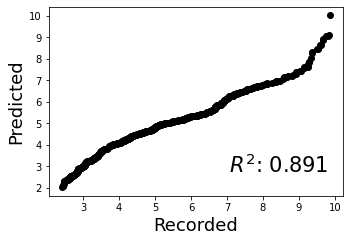

In [22]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)
df_future_45= RCP(df_RCP45_MACA,df_AI,Model, 4.5, saveRCP_45)
df_future_45.describe()

In [23]:
%run -i XAI.py

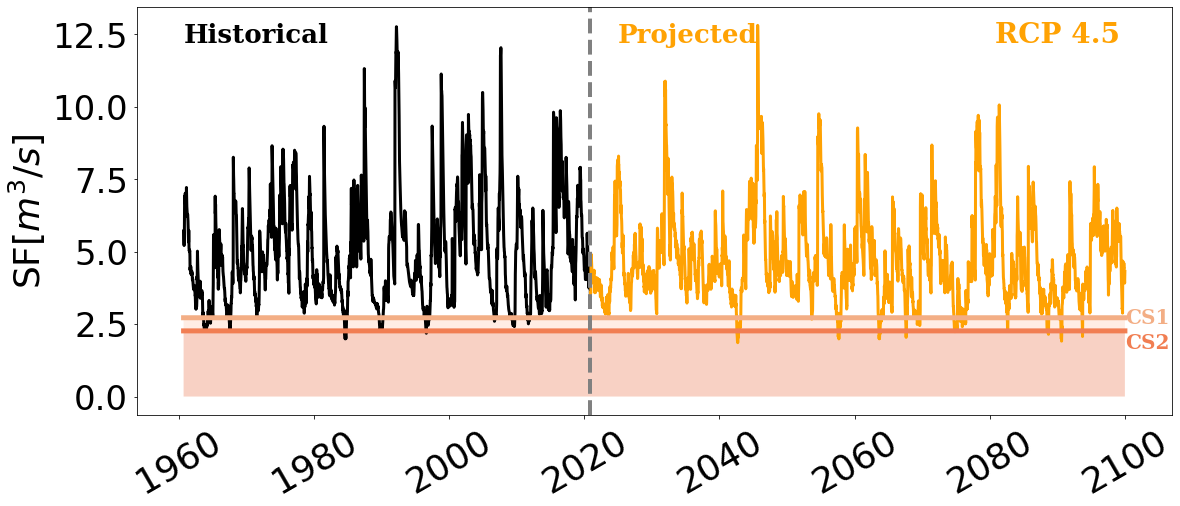

In [24]:
plot_projections(df_future_45,df_AI,4.5,saveRCP_45)

In [25]:
df_future_45.describe()
df_future_45.to_excel(saveRCP_45+str('/df_future_RCP45.xlsx'))

## Project 8.5

############ Model Validation set Accuracy RCP 8.5###########
MAE: 0.672 m/s^3
NSE: 0.811
RMS: 0.785 m/s^3
R-squared: 0.811
########################################
 
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,6.521904,16.379247,28.569190,17.645703,4.283266
std,3.448643,7.631918,8.008655,28.773308,1.320820
min,1.000000,-5.535311,-2.486796,0.000000,1.712903
25%,4.000000,10.060586,22.574082,0.954906,3.280358
50%,7.000000,17.371142,29.125358,6.595418,4.046615
75%,10.000000,23.460161,34.967030,21.590188,5.162895
max,12.000000,29.437982,46.867452,341.637357,8.963113


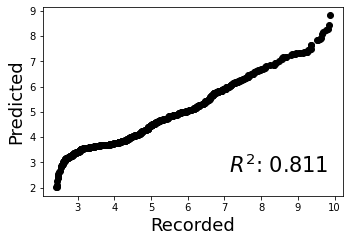

In [26]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)
df_future_85= RCP(df_RCP85_MACA,df_AI,Model, 8.5, saveRCP_85)

df_future_85.describe()

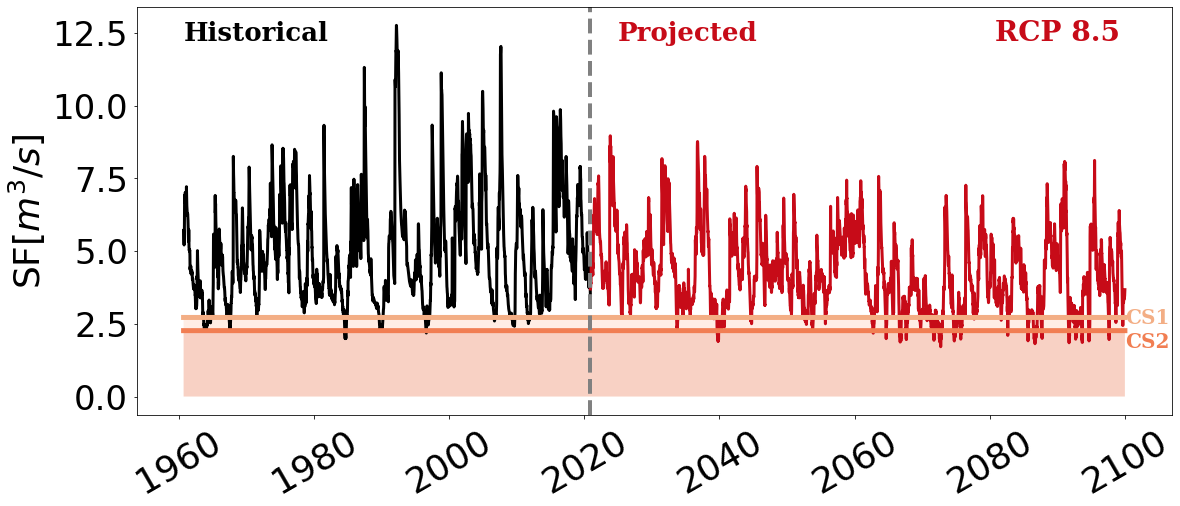

In [27]:
plot_projections(df_future_85,df_AI,8.5,saveRCP_85)

In [28]:
df_future_85.to_excel(saveRCP_85+str('/df_future_RCP85.xlsx'))

# Check the relationship with the evaportaion and soil moisture

In [29]:
df_read = df_AI.copy()

In [30]:

df_AI2 = pd.DataFrame()

df_AI2['$T_{min}$ [$^oC$]'] = df_read['$T_{min}$ [$^oC$]'].resample('M').mean()
df_AI2['$T_{max}$ [$^oC$]'] = df_read['$T_{max}$ [$^oC$]'].resample('M').mean()
df_AI2['$P$ [mm]'] = df_read['$P$ [mm]'].resample('M').sum()


df_AI2 = (df_AI2[(df_AI2.index >= '1960-09-01')& (df_AI2.index <= Approved_date)])

df_AI2

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
DATE,,,
1960-09-30,16.735714,32.971429,0.0
1960-10-31,16.074286,28.380000,315.3
1960-11-30,10.300000,21.432143,64.3
1960-12-31,2.892857,15.025000,59.3
1961-01-31,2.434286,14.077143,62.0
...,...,...,...
2020-06-30,21.642857,32.946429,68.9
2020-07-31,24.396429,36.832143,22.3
2020-08-31,23.425714,37.662857,36.0


In [31]:
TErraclimate = pd.read_csv('terraclimate.csv',
                           skiprows=13, usecols= ['aet(mm)','soil(mm)'])

TErraclimate=TErraclimate.rename(columns = {"aet(mm)":"$ET$ [mm]", 'soil(mm)': '$SM$ [mm]'})


TErraclimate  =TErraclimate.iloc[32:,:]
TErraclimate = TErraclimate.iloc[:-2,:]

TErraclimate

,$ET$ [mm],$SM$ [mm]
32,24.9,23.4
33,114.8,133.2
34,66.4,121.1
35,65.1,152.1
36,45.9,137.7
...,...,...
749,91.3,16.6
750,40.4,15.5
751,12.1,14.6
752,141.1,80.7


In [32]:
SF_Terraclimate = Sf_data.resample('M').mean()

SF_Terraclimate = (SF_Terraclimate[(SF_Terraclimate.index>= '1960-09-30')& (SF_Terraclimate.index<= '2020-10-31')])

SF_Terraclimate


,SF$[m^3/s]$
Date,
1960-09-30,5.721767
1960-10-31,5.400968
1960-11-30,6.761767
1960-12-31,6.845935
1961-01-31,6.729097
...,...
2020-06-30,5.414233
2020-07-31,4.772710
2020-08-31,3.947000


In [33]:
df_AI2 = pd.concat([df_AI2,SF_Terraclimate],axis=1)


In [34]:
#df_AI['$R_w$ [mm]'] = df_AI['$R_w$ [mm]'].to_numpy()
df_AI2['$SM$ [mm]'] = TErraclimate['$SM$ [mm]'].to_numpy()
df_AI2['$ET$ [mm]'] = TErraclimate['$ET$ [mm]'].to_numpy()
df_AI2.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,$SM$ [mm],$ET$ [mm]
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,13.562576,26.464571,75.665111,4.998356,62.911496,68.299169
std,7.193569,6.970855,71.998064,1.847586,51.354399,38.025257
min,-1.436429,10.310714,0.000000,2.043367,8.100000,1.200000
25%,6.887500,20.466964,25.242006,3.559840,23.700000,40.800000
50%,13.870000,27.163929,57.300000,4.658229,45.450000,62.050000
75%,20.563214,32.646429,101.275000,6.049533,89.475000,91.750000
max,25.360714,39.421429,642.000000,12.611161,251.300000,182.800000


In [35]:
# Pumping patterns is hypothesized to be associated with the month
df_AI2['Month'] = df_AI2.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI2['$T_{max}^{lag1}$ [$^oC$]'] = df_AI2['$T_{max}$ [$^oC$]'].shift(1)
df_AI2['$T_{max}^{lag2}$ [$^oC$]'] = df_AI2['$T_{max}$ [$^oC$]'].shift(2)

df_AI2['$T_{min}^{lag1}$ [$^oC$]'] = df_AI2['$T_{min}$ [$^oC$]'].shift(1)
df_AI2['$T_{min}^{lag2}$ [$^oC$]'] = df_AI2['$T_{min}$ [$^oC$]'].shift(2)

df_AI2['$P^{lag1}$ [mm]'] = df_AI2['$P$ [mm]'].shift(1)
df_AI2['$P^{lag2}$ [mm]'] = df_AI2['$P$ [mm]'].shift(2)

df_AI2['SF$^{lag1} [m^3/s]$'] = df_AI2['SF$[m^3/s]$'].shift(1)
df_AI2['SF$^{lag2} [m^3/s]$'] = df_AI2['SF$[m^3/s]$'].shift(2)

df_AI2.dropna(inplace=True)


In [36]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','$SM$ [mm]','$ET$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']


#Take the tain set till 2005 and test set from 2006 till 2020

df_AI2_Train = df_AI2[:'2008-12-31']
df_AI2_Test = df_AI2['2009-01-01':]

#Create Independent and dependent variable for machine learning
X = df_AI2[Features].to_numpy()
Y = df_AI2[Target].to_numpy()
test_X = df_AI2_Test[Features].iloc[0].to_numpy().reshape(1, -1)

In [37]:
Model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9172796274701319, max_delta_step=0, max_depth=11,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=947, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
train_X = df_AI2_Train[Features].to_numpy()
y_train = df_AI2_Train[Target].to_numpy()

#Model = ExtraTreesRegressor() 
Model = Model.fit(train_X, y_train.ravel())

RMS = np.sqrt(mean_squared_error(y_train,Model.predict(train_X)))
RSQ = r2_score(y_train,Model.predict(train_X))
MAE = np.mean(np.abs((y_train -Model.predict(train_X)))) 
NSEe = NSE(Model.predict(train_X),y_train.ravel())


print("############ Model Accuracy -Training set ############")
print("MAE: %0.3f" % MAE,'m/s^3')
print("NSE: %0.3f" % NSEe)
print("RMS: %0.3f" % RMS, 'm/s^3')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


############ Model Accuracy -Training set ############
MAE: 2.015 m/s^3
NSE: 1.000
RMS: 0.001 m/s^3
R-squared: 1.000
########################################
 


In [39]:

##################################################################
# Make predictions on Testing data and Test model accuracy
###################################################################
df_AI2_Test['SF$^{pred} [m^3/s]$'] = 0
Test_X = df_AI2_Test[Features].iloc[0].to_numpy().reshape(1, -1)
df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[0] = Model .predict(Test_X)[0]

i = 0
for row in df_AI2_Test.itertuples():
    df_AI2_Test['SF$^{lag1} [m^3/s]$'][i+1] = df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[i] 
    df_AI2_Test['SF$^{lag2} [m^3/s]$'][i+1] = df_AI2_Test['SF$^{lag1} [m^3/s]$'].iloc[i]  
    Test_X = df_AI2_Test[Features].iloc[i+1].to_numpy().reshape(1, -1)
    df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[i+1] = Model.predict(Test_X)[0]
    i = i+1
    if i == (len(df_AI2_Test)-1):
        break
RMS = np.sqrt(mean_squared_error(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
                  df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
RSQ = r2_score(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
               df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
MAE = np.mean(np.abs(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
                     df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))

NSEe = he.evaluator(he.nse,df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).tolist(),
          df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).tolist())
print("############ Model Accuracy -Test set############")
print("MAE: %0.3f" % MAE,'m/s^3')
print("NSE: %0.3f" % NSEe)
print("R-squared: %0.3f" % RSQ)
print("RMS: %0.3f" % RMS, 'm/s^3')
print("########################################")
print(" ")


############ Model Accuracy -Test set############
MAE: 0.401 m/s^3
NSE: 0.933
R-squared: 0.933
RMS: 0.463 m/s^3
########################################
 


In [40]:
Model = Model 

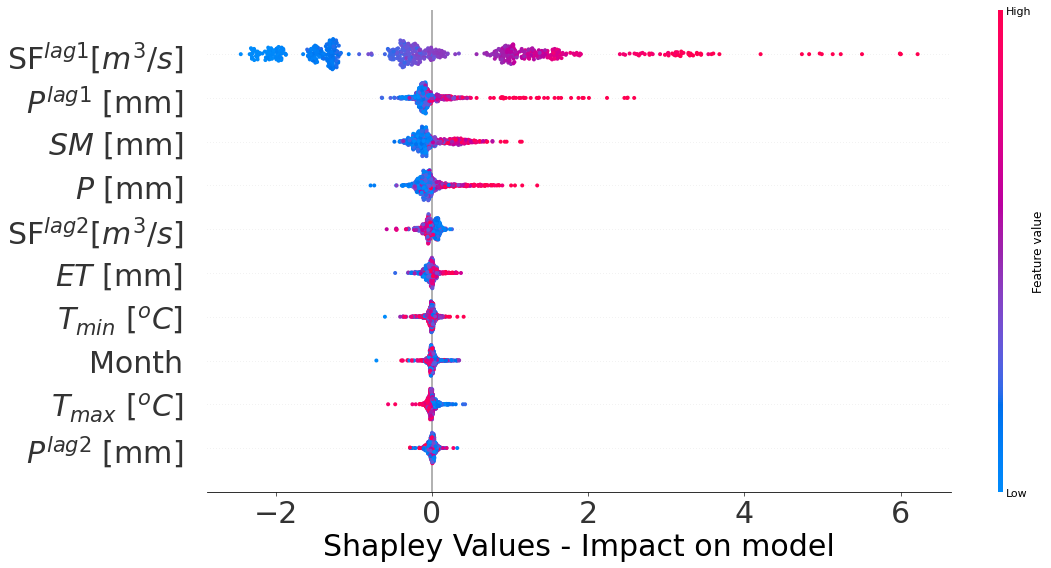

In [41]:
explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI2[Features].to_numpy())

shap.summary_plot(shap_values, df_AI2[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(save_Model +str('/Feature Importance ET-SM- SF.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

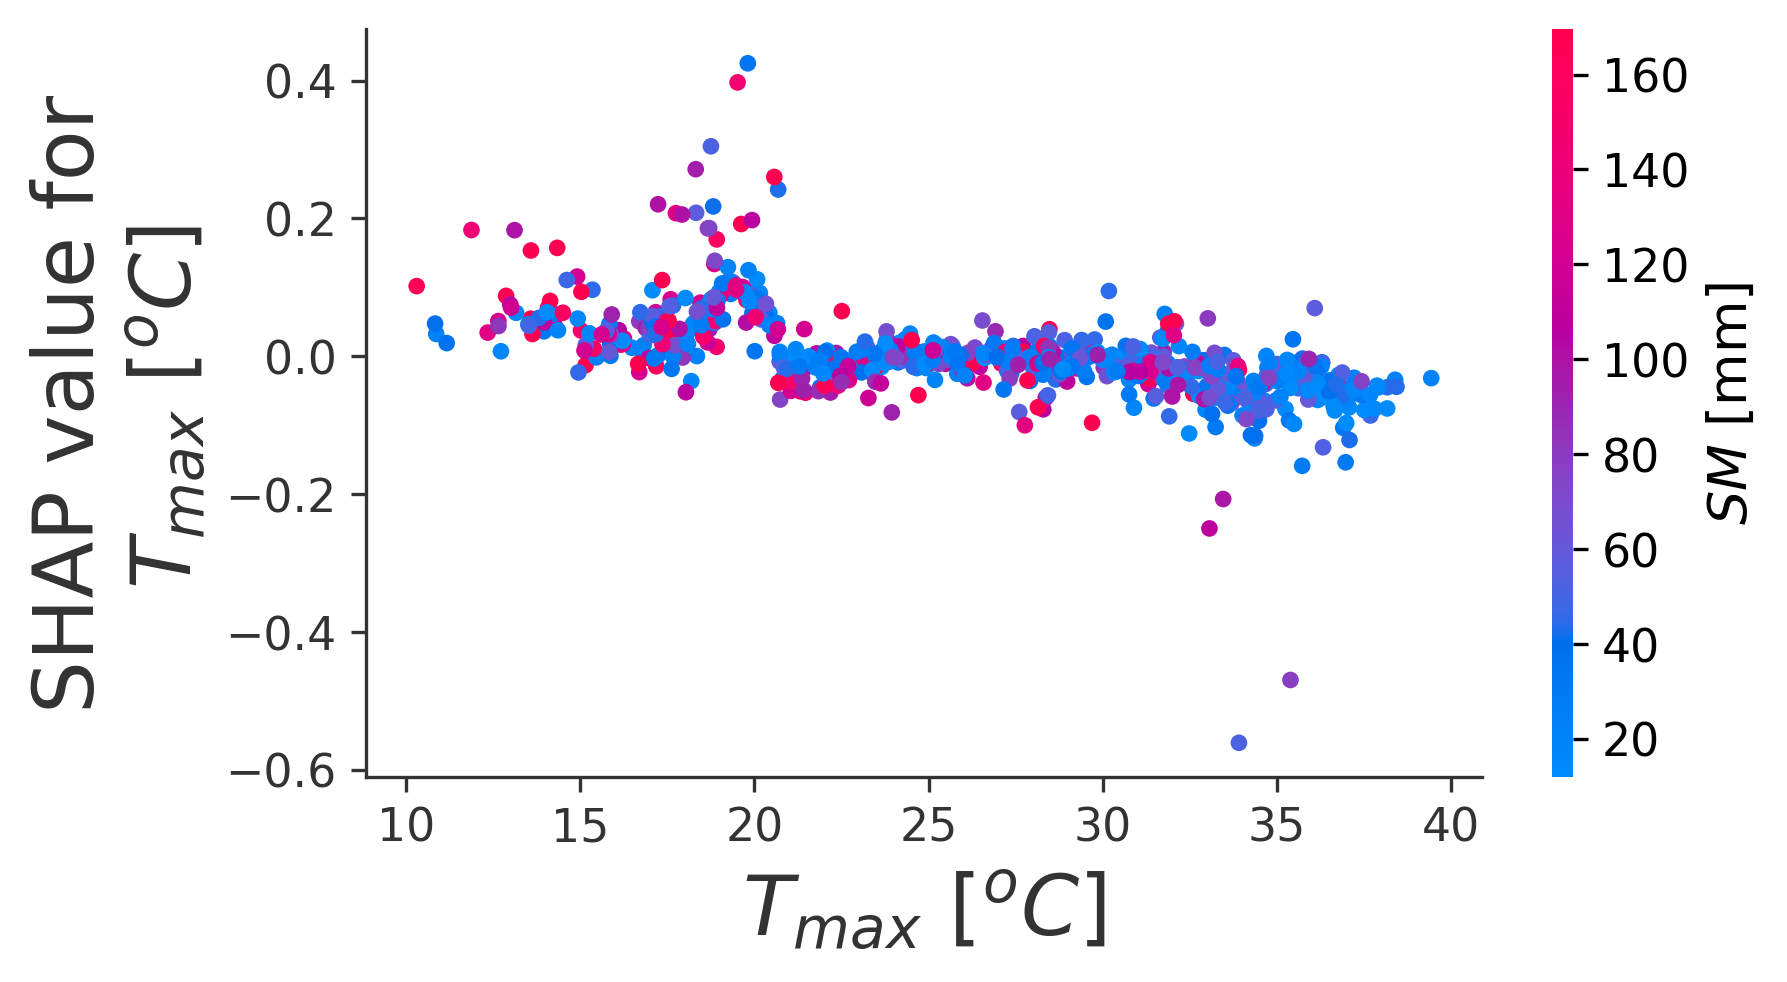

In [44]:

fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$SM$ [mm]')
plt.ylabel('SHAP value for'+'\n'+'$T_{max}$ [$^oC$] ',fontsize = 20)
plt.xlabel('$T_{max}$ [$^oC$]',fontsize = 20)

plt.savefig(save_Model +str('/Feature Interaction_comal_springs - Tmax2 - Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


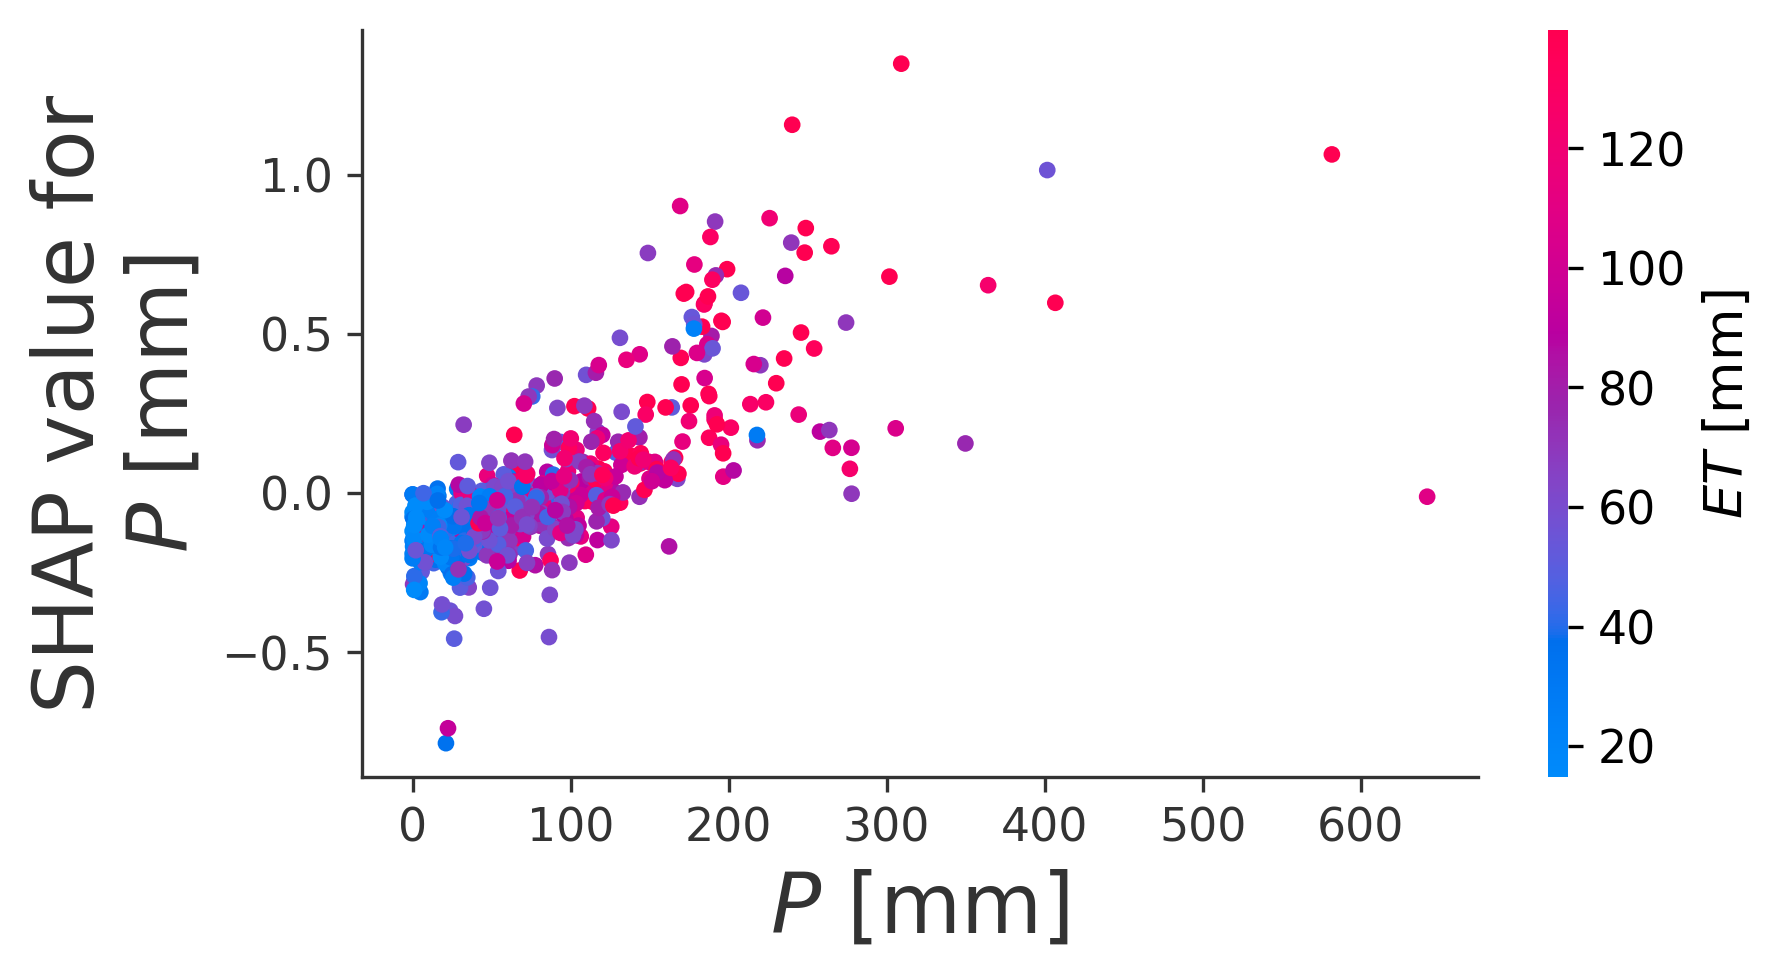

In [45]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$P$ [mm]',shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$ET$ [mm]')
plt.ylabel('SHAP value for'+'\n'+'$P$ [mm]',fontsize = 20)
plt.xlabel('$P$ [mm]',fontsize = 20)

plt.savefig(save_Model +str('/Feature Interaction_comal_springs  - Pr-ET2 -Comal Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')
